In [55]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
df_d = pd.read_excel('/content/dumi_scaled_result.xlsx')
df_e = pd.read_excel('/content/enc_scaled_result.xlsx')

# Clustering

## Clustering_dummied

In [75]:
# clus_d = df_d[[
# '시간단위기온',
# '시간단위습도'
# ]] # x

# clus_d = df_d[[
# '시간단위강수량',
# '시간단위습도'
# ]] # x


clus_d = df_d[[
'시간단위습도'
]] #x


#clus_d = df_d[[
#'GIS_Y좌표'
#]] #x


#clus_d = df_d[[
#'경도'
#]] #x

#clus_d = df_d[[
#'위도'
#]]

clus_d = clus_d.dropna()

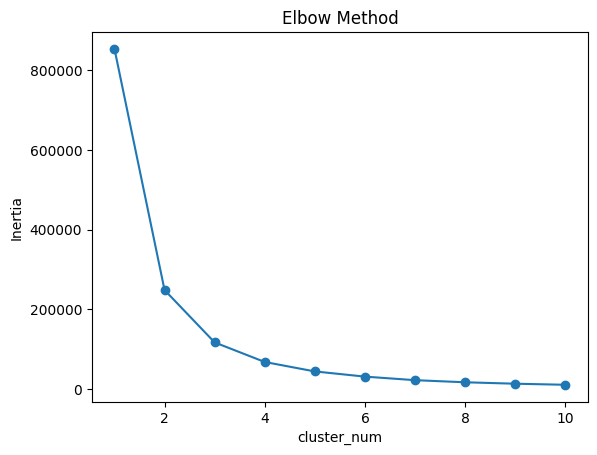

In [76]:
warnings.filterwarnings('ignore')
k_values = range(1, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_res = kmeans.fit(clus_d)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('cluster_num')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [77]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(clus_d)
label = kmeans.labels_
label = pd.Series(label)
clus_d['label'] = label.values
clus_d = pd.concat((df_d, clus_d['label']), axis=1)
clus_d.head()

,Unnamed: 0,건물구조동수,지상층수,지하층수,연면적,바닥면적,사망수,부상자수,사망인명피해수,재산피해금액,...,긴급통제단운영여부_Y,임야화재구분_기타,임야화재구분_논/밭두렁으로부터확대,임야화재구분_담뱃불,임야화재구분_미상,임야화재구분_쓰레기소각장에서확대,임야화재발화지점_산아래,임야화재발화지점_산중턱,임야화재발화지점_평지,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,2,0,114,71,0,0,0,8860,...,0,0,0,0,0,0,0,0,0,1
3,3,0,0,0,0,0,0,0,0,6672,...,0,0,0,0,0,0,0,0,0,1
4,4,1,10,0,1448,207,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [78]:
df_to_split_d = clus_d
#df_to_split = pd.read_excel('/content/cluster_test.xlsx')

In [79]:
df_clus_d1 = df_to_split_d[df_to_split_d['label'] == 0]
df_clus_d2 = df_to_split_d[df_to_split_d['label'] == 1]
df_clus_d3 = df_to_split_d[df_to_split_d['label'] == 2]

print(df_clus_d1.shape)
print(df_clus_d2.shape)
print(df_clus_d3.shape)

(793, 399)
(591, 399)
(622, 399)


## Clustering_encoded

In [80]:
# clus_e = df_e[['시간단위기온',
# '시간단위습도']]

# clus_e = df_e[[
# '시간단위강수량',
# '시간단위습도'
# ]] # x

clus_e = df_e[[
'시간단위습도'
]] #x


clus_e = clus_e.dropna()

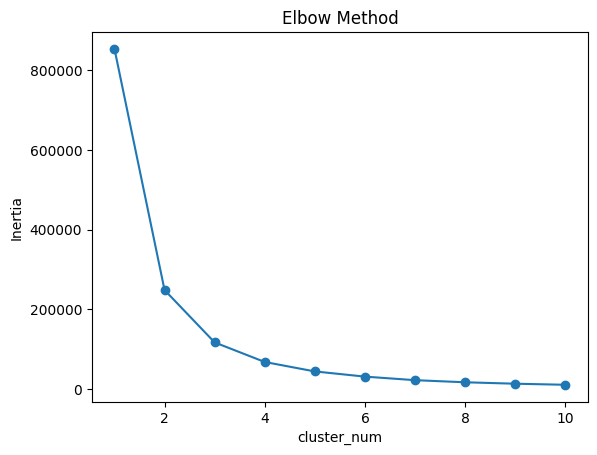

In [44]:
warnings.filterwarnings('ignore')
k_values = range(1, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_res = kmeans.fit(clus_e)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('cluster_num')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [45]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(clus_e)
label = kmeans.labels_
label = pd.Series(label)
clus_e['label'] = label.values
clus_e = pd.concat((df_e, clus_e['label']), axis=1)
clus_e.head()

,Unnamed: 0,건물구조동수,지상층수,지하층수,연면적,바닥면적,사망수,부상자수,사망인명피해수,재산피해금액,...,발화기기대분류명_encoded,연소확대물대분류명_encoded,시설장소대분류명_encoded,화재보험의무가입대상여부_encoded,방화관리대상여부_encoded,다중이용업여부_encoded,긴급통제단운영여부_encoded,임야화재구분_encoded,임야화재발화지점_encoded,label
0,0,0,0,0,0,0,0,0,0,0,...,14,13,1,0,0,0,1,5,3,0
1,1,0,0,0,0,0,0,0,0,0,...,14,13,1,0,0,0,1,5,3,0
2,2,1,2,0,114,71,0,0,0,8860,...,6,13,3,0,0,0,1,5,3,1
3,3,0,0,0,0,0,0,0,0,6672,...,14,8,10,0,0,0,1,5,3,1
4,4,1,10,0,1448,207,0,0,0,0,...,14,13,11,0,0,0,1,5,3,1


In [46]:
df_to_split_e = clus_e
#df_to_split = pd.read_excel('/content/cluster_test.xlsx')

In [47]:
df_clus_e1 = df_to_split_e[df_to_split_e['label'] == 0]
df_clus_e2 = df_to_split_e[df_to_split_e['label'] == 1]
df_clus_e3 = df_to_split_e[df_to_split_e['label'] == 2]

print(df_clus_e1.shape)
print(df_clus_e2.shape)
print(df_clus_e3.shape)

(793, 57)
(591, 57)
(622, 57)


# Regression

## Cluster_dummied

In [81]:
#----------------------------------------------------------------------------------------------------------------------------

y_d_data_c1 = df_clus_d1['재산피해금액']
x_d_data_c1 =df_clus_d1.drop(['재산피해금액'],axis=1,inplace=False)
x_d_train_c1, x_d_test_c1, y_d_train_c1, y_d_test_c1 = train_test_split(x_d_data_c1, y_d_data_c1, test_size=0.2, random_state=156)

lr_c1 = LinearRegression().fit(x_d_train_c1, y_d_train_c1)
ridge_c1 = Ridge(alpha=1.0).fit(x_d_train_c1, y_d_train_c1)
lasso_c1 = Lasso().fit(x_d_train_c1, y_d_train_c1)

y_d_lr_preds_c1 = lr_c1.predict(x_d_test_c1)
y_d_rid_preds_c1 = ridge_c1.predict(x_d_test_c1)
y_d_laso_preds_c1 = lasso_c1.predict(x_d_test_c1)

mse_d_lr_c1 = mean_squared_error(y_d_test_c1, y_d_lr_preds_c1)
mse_d_rid_c1 = mean_squared_error(y_d_test_c1, y_d_rid_preds_c1)
mse_d_laso_c1 = mean_squared_error(y_d_test_c1, y_d_laso_preds_c1)

rmse_d_lr_c1 = np.sqrt(mse_d_lr_c1)
rmse_d_rid_c1 = np.sqrt(mse_d_rid_c1)
rmse_d_laso_c1 = np.sqrt(mse_d_laso_c1)

#----------------------------------------------------------------------------------------------------------------------------

y_d_data_c2 = df_clus_d2['재산피해금액']
x_d_data_c2 =df_clus_d2.drop(['재산피해금액'],axis=1,inplace=False)
x_d_train_c2, x_d_test_c2, y_d_train_c2, y_d_test_c2 = train_test_split(x_d_data_c2, y_d_data_c2, test_size=0.2, random_state=156)

lr_c2 = LinearRegression().fit(x_d_train_c2, y_d_train_c2)
ridge_c2 = Ridge(alpha=1.0).fit(x_d_train_c2, y_d_train_c2)
lasso_c2 = Lasso().fit(x_d_train_c2, y_d_train_c2)

y_d_lr_preds_c2 = lr_c2.predict(x_d_test_c2)
y_d_rid_preds_c2 = ridge_c2.predict(x_d_test_c2)
y_d_laso_preds_c2 = lasso_c2.predict(x_d_test_c2)

mse_d_lr_c2 = mean_squared_error(y_d_test_c2, y_d_lr_preds_c2)
mse_d_rid_c2 = mean_squared_error(y_d_test_c2, y_d_rid_preds_c2)
mse_d_laso_c2 = mean_squared_error(y_d_test_c2, y_d_laso_preds_c2)

rmse_d_lr_c2 = np.sqrt(mse_d_lr_c2)
rmse_d_rid_c2 = np.sqrt(mse_d_rid_c2)
rmse_d_laso_c2 = np.sqrt(mse_d_laso_c2)

#----------------------------------------------------------------------------------------------------------------------------

y_d_data_c3 = df_clus_d3['재산피해금액']
x_d_data_c3 =df_clus_d3.drop(['재산피해금액'],axis=1,inplace=False)
x_d_train_c3, x_d_test_c3, y_d_train_c3, y_d_test_c3 = train_test_split(x_d_data_c3, y_d_data_c3, test_size=0.2, random_state=156)

lr_c3 = LinearRegression().fit(x_d_train_c3, y_d_train_c3)
ridge_c3 = Ridge(alpha=1.0).fit(x_d_train_c3, y_d_train_c3)
lasso_c3 = Lasso().fit(x_d_train_c3, y_d_train_c3)

y_d_lr_preds_c3 = lr_c3.predict(x_d_test_c3)
y_d_rid_preds_c3 = ridge_c3.predict(x_d_test_c3)
y_d_laso_preds_c3 = lasso_c3.predict(x_d_test_c3)

mse_d_lr_c3 = mean_squared_error(y_d_test_c3, y_d_lr_preds_c3)
mse_d_rid_c3 = mean_squared_error(y_d_test_c3, y_d_rid_preds_c3)
mse_d_laso_c3 = mean_squared_error(y_d_test_c3, y_d_laso_preds_c3)

rmse_d_lr_c3 = np.sqrt(mse_d_lr_c3)
rmse_d_rid_c3 = np.sqrt(mse_d_rid_c3)
rmse_d_laso_c3 = np.sqrt(mse_d_laso_c3)

#----------------------------------------------------------------------------------------------------------------------------

print("Dummied_Non Cluster_Non PCA_clus1")
print("lr")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_d_lr_c1, rmse_d_lr_c1))
print('Variance score: {0:.3f}'.format(r2_score(y_d_test_c1, y_d_lr_preds_c1)))
print('-'*30)
print("ridge")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_d_rid_c1, rmse_d_rid_c1))
print('Variance score: {0:.3f}'.format(r2_score(y_d_test_c1, y_d_rid_preds_c1)))
print('-'*30)
print("lasso")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_d_laso_c1, rmse_d_laso_c1))
print('Variance score: {0:.3f}'.format(r2_score(y_d_test_c1, y_d_laso_preds_c1)), '\n\n')

print("Dummied_Non Cluster_Non PCA_clus2")
print("lr")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_d_lr_c2 , rmse_d_lr_c2))
print('Variance score: {0:.3f}'.format(r2_score(y_d_test_c2, y_d_lr_preds_c2)))
print('-'*30)
print("ridge")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_d_rid_c2 , rmse_d_rid_c2))
print('Variance score: {0:.3f}'.format(r2_score(y_d_test_c2, y_d_rid_preds_c2)))
print('-'*30)
print("lasso")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_d_laso_c2, rmse_d_laso_c2))
print('Variance score: {0:.3f}'.format(r2_score(y_d_test_c2, y_d_laso_preds_c2)), '\n\n')

print("Dummied_Non Cluster_Non PCA_clus3")
print("lr")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_d_lr_c3, rmse_d_lr_c3))
print('Variance score: {0:.3f}'.format(r2_score(y_d_test_c3, y_d_lr_preds_c3)))
print('-'*30)
print("ridge")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_d_rid_c3, rmse_d_rid_c3))
print('Variance score: {0:.3f}'.format(r2_score(y_d_test_c3, y_d_rid_preds_c3)))
print('-'*30)
print("lasso")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_d_laso_c3, rmse_d_laso_c3))
print('Variance score: {0:.3f}'.format(r2_score(y_d_test_c3, y_d_laso_preds_c3)))


Dummied_Non Cluster_Non PCA_clus1
lr
MSE: 427778509489.515 , RMSE: 654047.788
Variance score: -2850.422
------------------------------
ridge
MSE: 73134707298.891 , RMSE: 270434.294
Variance score: -486.490
------------------------------
lasso
MSE: 50308689183.933 , RMSE: 224295.986
Variance score: -334.340 


Dummied_Non Cluster_Non PCA_clus2
lr
MSE: 65151197821.250 , RMSE: 255247.327
Variance score: -9404.406
------------------------------
ridge
MSE: 83828394125.006 , RMSE: 289531.335
Variance score: -12100.697
------------------------------
lasso
MSE: 41710380618.116 , RMSE: 204231.194
Variance score: -6020.425 


Dummied_Non Cluster_Non PCA_clus3
lr
MSE: 36503344.042 , RMSE: 6041.800
Variance score: -0.963
------------------------------
ridge
MSE: 34639499.646 , RMSE: 5885.533
Variance score: -0.862
------------------------------
lasso
MSE: 31530705.487 , RMSE: 5615.221
Variance score: -0.695


## Cluster_encoded

In [48]:
#----------------------------------------------------------------------------------------------------------------------------
y_e_data_c1 = df_clus_e1['사망인명피해수']
x_e_data_c1 =df_clus_e1.drop(['사망인명피해수'],axis=1,inplace=False)
x_d_train_c1, x_d_test_c1, y_d_train_c1, y_d_test_c1 = train_test_split(x_e_data_c1, y_e_data_c1, test_size=0.2, random_state=156)

lr_c1 = LinearRegression().fit(x_d_train_c1, y_d_train_c1)
ridge_c1 = Ridge(alpha=1.0).fit(x_d_train_c1, y_d_train_c1)
lasso_c1 = Lasso().fit(x_d_train_c1, y_d_train_c1)

y_d_lr_preds_c1 = lr_c1.predict(x_d_test_c1)
y_d_rid_preds_c1 = ridge_c1.predict(x_d_test_c1)
y_d_laso_preds_c1 = lasso_c1.predict(x_d_test_c1)

mse_d_lr_c1 = mean_squared_error(y_d_test_c1, y_d_lr_preds_c1)
mse_d_rid_c1 = mean_squared_error(y_d_test_c1, y_d_rid_preds_c1)
mse_d_laso_c1 = mean_squared_error(y_d_test_c1, y_d_laso_preds_c1)

rmse_d_lr_c1 = np.sqrt(mse_d_lr_c1)
rmse_d_rid_c1 = np.sqrt(mse_d_rid_c1)
rmse_d_laso_c1 = np.sqrt(mse_d_laso_c1)

#----------------------------------------------------------------------------------------------------------------------------

y_e_data_c2 = df_clus_e2['사망인명피해수']
x_e_data_c2 =df_clus_e2.drop(['사망인명피해수'],axis=1,inplace=False)
x_d_train_c2, x_d_test_c2, y_d_train_c2, y_d_test_c2 = train_test_split(x_e_data_c2, y_e_data_c2, test_size=0.2, random_state=156)

lr_c2 = LinearRegression().fit(x_d_train_c2, y_d_train_c2)
ridge_c2 = Ridge(alpha=1.0).fit(x_d_train_c2, y_d_train_c2)
lasso_c2 = Lasso().fit(x_d_train_c2, y_d_train_c2)

y_d_lr_preds_c2 = lr_c2.predict(x_d_test_c2)
y_d_rid_preds_c2 = ridge_c2.predict(x_d_test_c2)
y_d_laso_preds_c2 = lasso_c2.predict(x_d_test_c2)

mse_d_lr_c2 = mean_squared_error(y_d_test_c2, y_d_lr_preds_c2)
mse_d_rid_c2 = mean_squared_error(y_d_test_c2, y_d_rid_preds_c2)
mse_d_laso_c2 = mean_squared_error(y_d_test_c2, y_d_laso_preds_c2)

rmse_d_lr_c2 = np.sqrt(mse_d_lr_c2)
rmse_d_rid_c2 = np.sqrt(mse_d_rid_c2)
rmse_d_laso_c2 = np.sqrt(mse_d_laso_c2)

#----------------------------------------------------------------------------------------------------------------------------

y_e_data_c3 = df_clus_e3['사망인명피해수']
x_e_data_c3 =df_clus_e3.drop(['사망인명피해수'],axis=1,inplace=False)
x_d_train_c3, x_d_test_c3, y_d_train_c3, y_d_test_c3 = train_test_split(x_e_data_c3, y_e_data_c3, test_size=0.2, random_state=156)

lr_c3 = LinearRegression().fit(x_d_train_c3, y_d_train_c3)
ridge_c3 = Ridge(alpha=1.0).fit(x_d_train_c3, y_d_train_c3)
lasso_c3 = Lasso().fit(x_d_train_c3, y_d_train_c3)

y_d_lr_preds_c3 = lr_c3.predict(x_d_test_c3)
y_d_rid_preds_c3 = ridge_c3.predict(x_d_test_c3)
y_d_laso_preds_c3 = lasso_c3.predict(x_d_test_c3)

mse_d_lr_c3 = mean_squared_error(y_d_test_c3, y_d_lr_preds_c3)
mse_d_rid_c3 = mean_squared_error(y_d_test_c3, y_d_rid_preds_c3)
mse_d_laso_c3 = mean_squared_error(y_d_test_c3, y_d_laso_preds_c3)

rmse_d_lr_c3 = np.sqrt(mse_d_lr_c3)
rmse_d_rid_c3 = np.sqrt(mse_d_rid_c3)
rmse_d_laso_c3 = np.sqrt(mse_d_laso_c3)

#----------------------------------------------------------------------------------------------------------------------------

print("Encoded_Non Cluster_Non PCA_clus1")
print("lr")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_d_lr_c1, rmse_d_lr_c1))
print('Variance score: {0:.3f}'.format(r2_score(y_d_test_c1, y_d_lr_preds_c1)))
print('-'*30)
print("ridge")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_d_rid_c1, rmse_d_rid_c1))
print('Variance score: {0:.3f}'.format(r2_score(y_d_test_c1, y_d_rid_preds_c1)))
print('-'*30)
print("lasso")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_d_laso_c1, rmse_d_laso_c1))
print('Variance score: {0:.3f}'.format(r2_score(y_d_test_c1, y_d_laso_preds_c1)), '\n\n')

print("Encoded_Non Cluster_Non PCA_clus2")
print("lr")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_d_lr_c2 , rmse_d_lr_c2))
print('Variance score: {0:.3f}'.format(r2_score(y_d_test_c2, y_d_lr_preds_c2)))
print('-'*30)
print("ridge")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_d_rid_c2 , rmse_d_rid_c2))
print('Variance score: {0:.3f}'.format(r2_score(y_d_test_c2, y_d_rid_preds_c2)))
print('-'*30)
print("lasso")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_d_laso_c2, rmse_d_laso_c2))
print('Variance score: {0:.3f}'.format(r2_score(y_d_test_c2, y_d_laso_preds_c2)), '\n\n')

print("Encoded_Non Cluster_Non PCA_clus3")
print("lr")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_d_lr_c3, rmse_d_lr_c3))
print('Variance score: {0:.3f}'.format(r2_score(y_d_test_c3, y_d_lr_preds_c3)))
print('-'*30)
print("ridge")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_d_rid_c3, rmse_d_rid_c3))
print('Variance score: {0:.3f}'.format(r2_score(y_d_test_c3, y_d_rid_preds_c3)))
print('-'*30)
print("lasso")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_d_laso_c3, rmse_d_laso_c3))
print('Variance score: {0:.3f}'.format(r2_score(y_d_test_c3, y_d_laso_preds_c3)))


Encoded_Non Cluster_Non PCA_clus1
lr
MSE: 0.000 , RMSE: 0.000
Variance score: 1.000
------------------------------
ridge
MSE: 0.019 , RMSE: 0.136
Variance score: 0.241
------------------------------
lasso
MSE: 0.212 , RMSE: 0.460
Variance score: -7.637 


Encoded_Non Cluster_Non PCA_clus2
lr
MSE: 0.000 , RMSE: 0.000
Variance score: 1.000
------------------------------
ridge
MSE: 0.030 , RMSE: 0.174
Variance score: 0.888
------------------------------
lasso
MSE: 14.776 , RMSE: 3.844
Variance score: -53.976 


Encoded_Non Cluster_Non PCA_clus3
lr
MSE: 0.000 , RMSE: 0.000
Variance score: 1.000
------------------------------
ridge
MSE: 0.001 , RMSE: 0.025
Variance score: 0.997
------------------------------
lasso
MSE: 0.191 , RMSE: 0.437
Variance score: -0.027


## Non_Cluster_dummied

In [54]:
y_d_data = df_d['재산피해금액']
x_d_data =df_d.drop(['재산피해금액'],axis=1,inplace=False)
x_d_train, x_d_test, y_d_train, y_d_test = train_test_split(x_d_data, y_d_data, test_size=0.2, random_state=156)


lr_d = LinearRegression().fit(x_d_train, y_d_train)
ridge_d = Ridge(alpha=1.0).fit(x_d_train, y_d_train)
lasso_d = Lasso().fit(x_d_train, y_d_train)

y_d_lr_preds = lr_d.predict(x_d_test)
y_d_rid_preds = ridge_d.predict(x_d_test)
y_d_laso_preds = lasso_d.predict(x_d_test)

mse_d_lr = mean_squared_error(y_d_test, y_d_lr_preds)
mse_d_rid = mean_squared_error(y_d_test, y_d_rid_preds)
mse_d_laso = mean_squared_error(y_d_test, y_d_laso_preds)

rmse_d_lr = np.sqrt(mse_d_lr)
rmse_d_rid = np.sqrt(mse_d_rid)
rmse_d_laso = np.sqrt(mse_d_laso)

print("Dummied_lr")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_d_lr , rmse_d_lr))
print('Variance score: {0:.3f}'.format(r2_score(y_d_test, y_d_lr_preds)), '\n\n')
print("Dummied_rid")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_d_rid , rmse_d_rid))
print('Variance score: {0:.3f}'.format(r2_score(y_d_test, y_d_rid_preds)), '\n\n')
print("Dummied_laso")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_d_laso , rmse_d_laso))
print('Variance score: {0:.3f}'.format(r2_score(y_d_test, y_d_laso_preds)), '\n\n')

Dummied_lr
MSE: 539217723.047 , RMSE: 23221.062
Variance score: 0.044 


Dummied_rid
MSE: 295904403.515 , RMSE: 17201.872
Variance score: 0.475 


Dummied_laso
MSE: 342518685.174 , RMSE: 18507.260
Variance score: 0.393 




##Non_Cluster_encoded

In [53]:
y_e_data = df_e['재산피해금액']
x_e_data =df_e.drop(['재산피해금액'],axis=1,inplace=False)
x_e_train, x_e_test, y_e_train, y_e_test = train_test_split(x_e_data, y_e_data, test_size=0.2, random_state=156)

lr_e = LinearRegression().fit(x_e_train, y_e_train)
ridge_e = Ridge(alpha=1.0).fit(x_e_train, y_e_train)
lasso_e = Lasso().fit(x_e_train, y_e_train)

y_e_lr_preds = lr_e.predict(x_e_test)
y_e_rid_preds = ridge_e.predict(x_e_test)
y_e_laso_preds = lasso_e.predict(x_e_test)

mse_e_lr = mean_squared_error(y_e_test, y_e_lr_preds)
mse_e_rid = mean_squared_error(y_e_test, y_e_rid_preds)
mse_e_laso = mean_squared_error(y_e_test, y_e_laso_preds)

rmse_e_lr = np.sqrt(mse_e_lr)
rmse_e_rid = np.sqrt(mse_e_rid)
rmse_e_laso = np.sqrt(mse_e_laso)

print("Encoded_lr")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_e_lr , rmse_e_lr))
print('Variance score: {0:.3f}'.format(r2_score(y_e_test, y_e_lr_preds)), '\n\n')
print("Encoded_rid")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_e_rid , rmse_e_rid))
print('Variance score: {0:.3f}'.format(r2_score(y_e_test, y_e_rid_preds)), '\n\n')
print("Encoded_laso")
print('MSE: {0:.3f} , RMSE: {1:.3F}'.format(mse_e_laso , rmse_e_laso))
print('Variance score: {0:.3f}'.format(r2_score(y_e_test, y_e_laso_preds)), '\n\n')

Encoded_lr
MSE: 251374155.741 , RMSE: 15854.783
Variance score: 0.554 


Encoded_rid
MSE: 231269689.093 , RMSE: 15207.554
Variance score: 0.590 


Encoded_laso
MSE: 250661354.718 , RMSE: 15832.288
Variance score: 0.556 


